In [1]:
import os
import numpy as np
import rasterio
import matplotlib.image 

import matplotlib.pyplot as plt


In [18]:
files = {}
lens = {}

for f in os.listdir("data"):
    if ".jp2" in f and "_202408" in f:
        parts = f.split("_")
        if parts[0] not in files:
            files[parts[0]] = {}
        if parts[1] not in files[parts[0]]:
            files[parts[0]][parts[1]] = {}
        files[parts[0]][parts[1]][parts[2]] = f"data/{f}"

        if parts[1][:6] not in lens:
            lens[parts[1][:6]] = []
        lens[parts[1][:6]] = list(set(lens[parts[1][:6]]+[parts[0]]))


In [19]:
{k: len(v) for k,v in lens.items()} 


{'202408': 17}

In [20]:
len(files)


17

1 T34UFG
2 T34VFH
3 T35VND
4 T35VMC
5 T35VNC
ERROR: T35VNC 20240825T091549 failed with 'data/T35VNC_20240825T091549_SCL_20m.jp2' not recognized as being in a supported file format.
6 T35UMB
7 T35VNE
8 T34VFJ
9 T35UNB
10 T34VDJ
11 T35ULB
12 T34VDH
13 T34UDG
14 T34VEJ
15 T34VDK
16 T34UEG
17 T34VEK


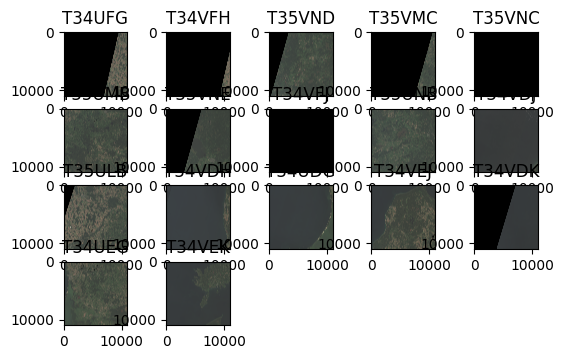

In [21]:
gain = 2

composites = {}

ct = 1
for ki, fi in files.items():
    print(ct, ki)
    plt.subplot(5, 5, ct, title=ki)

    red = np.full((10980, 10980), -32768)
    green = np.full((10980, 10980), -32768)
    blue = np.full((10980, 10980), -32768)
    
    for kj, fj in fi.items():
        try:
            scl = np.repeat(np.repeat(rasterio.open(fj["SCL"], driver="JP2OpenJPEG").read(1), 2, 0), 2, 1)
            
            c_red = rasterio.open(fj["B04"], driver="JP2OpenJPEG").read(1)
            c_green = rasterio.open(fj["B03"], driver="JP2OpenJPEG").read(1)
            c_blue = rasterio.open(fj["B02"], driver="JP2OpenJPEG").read(1)
        
            mask = ((scl != 0) & (scl != 1) & (scl != 3) & (scl != 7) & (scl != 8) & (scl != 9) & (scl != 10))
            red[mask] = c_red[mask]
            green[mask] = c_green[mask]
            blue[mask] = c_blue[mask]
        except BaseException as e:
            print(f"ERROR: {ki} {kj} failed with {e}")

    rgb_composite = np.dstack((
        np.clip(red * gain / 10000, 0, 1), 
        np.clip(green * gain / 10000, 0, 1), 
        np.clip(blue * gain / 10000, 0, 1)
    ))
    composites[ki] = rgb_composite
    plt.imshow(rgb_composite)
    ct += 1

plt.show()


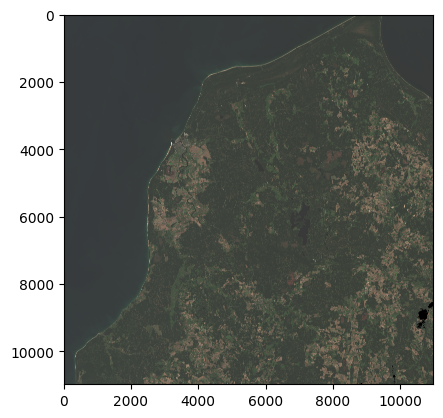

In [24]:
plt.imshow(composites["T34VEJ"])


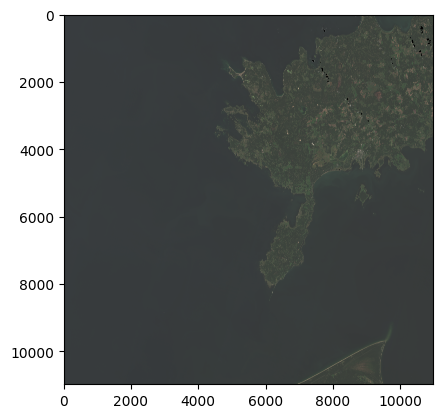

In [25]:
plt.imshow(composites["T34VEK"])


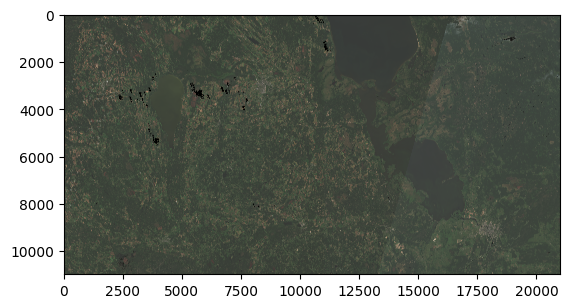

In [33]:
plt.imshow(np.concatenate((composites["T35VME"], composites["T35VNE"][:,980:]), axis=1))


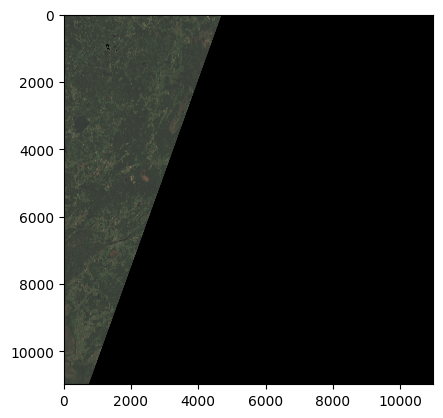

In [34]:
plt.imshow(composites["T35VND"])


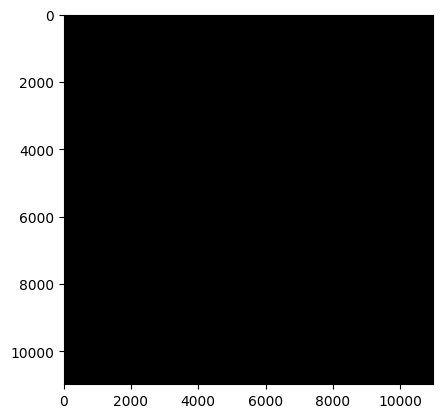

In [35]:
plt.imshow(composites["T35VMD"])


In [ ]:
plt.imshow(np.concatenate((composites["T35VMD"], composites["T35VND"][:,980:]), axis=1))
